# Sound wave example

# 1. Import libraries
To run some of the tools offered by Python we need to import libraries (or toolboxes). Most of them come installed with the Anaconda package, so we only need to import them as following (NOTE 1: in order to run the code in the box below, place the mouse pointer in the cell, then click on “run cell” button above) (NOTE 2: if after executing the code, you get an "ImportError” message, it means you need to install some missing libraries – see [this link](../0%20-%20Tutorials/2%20-%20How%20to%20install%20libraries.ipynb) for help):

In [1]:
# Library for scientific computing
import numpy as np
# Libraries for visualization
import ipywidgets as widgets
from ipywidgets import FloatSlider, VBox
from IPython.display import display, Audio, clear_output
from bqplot import pyplot as plt
from bqplot import Axis
from bqplot import LinearScale
from bqplot import pyplot as plt
from bqplot.traits import *
warnings.filterwarnings('ignore') # to ignore warning messages

# 2. Data
<left><img src="Videos/Standing_wave.gif" width="400px">

In this example we will define and then plot a sound wave which can be represented as a sine wave curve with a certain amplitude, phase and frequency using the following equation:

$y(x) = A \sin(2 \pi(\nu x + \phi ))$

where

$A = amplitude$

$\phi = phase$

$\nu = frequency$



### Definition of the sine wave curve
In the cell below we use three variables to define the initial values of the parameters amplitude, phase and frequency, a vector *x* to define the points at which the wave curve will be evaluated, and a vector *y(x)* to define the curve. For this purpose, we use some of the functions of the imported Numpy library, e.g. *np.linspace* to generate evenly spaced numbers over a specified interval or *np.pi* to get the value of π.

In [2]:
amp = 10 # amplitude
phase = 1 # phase
freq = 10 # frequency
x = np.linspace(0,1,500) # x axis from 0 to 1 with a 1/500 step
y = amp * np.sin(2 * np.pi * (freq * x + phase))

# 3. Visualization of the data
### Plot of the curve
Using the imported visualization libraries we can now plot the sine curve using the parameter values (amplitude, phase and frequency) defined in the cell above.

In [3]:
# First, let's create a scale for the x attribute, and a scale for the y attribute
x_sc_1 = LinearScale(min=0,max=1)
y_sc_1 = LinearScale(min=-20,max=20)
# Then we can define some of the features of the plot axes such as their labels.
x_ax_1 = Axis(label='x', scale=x_sc_1)
y_ax_1 = Axis(label='y', scale=y_sc_1, orientation='vertical')
# Finally we can define other additional features of the figure and plot the sine curve
fig_1 = plt.figure(scales={'x': x_sc_1, 'y': y_sc_1}, axes=[x_ax_1, y_ax_1], title = 'Sine wave', 
                   layout={'min_width': '1000px', 'max_height': '300px'})
sin_wave_1 = plt.plot(x,y) # Plot the sine curve
fig_1

Figure(axes=[Axis(label='x', scale=LinearScale(max=1.0, min=0.0)), Axis(label='y', orientation='vertical', sca…

### Excercise 1
We will now import some data (displayed in a black curve) and look at how the sine curve (blue) compare to those data. The goodness-of-fit between the two curves will be quantified by the root mean square error (RMSE)

In [4]:
# Black curve
import Black_curve
xk,yk = Black_curve.black_curve()

#RMSE
RMSE = np.sqrt((y - yk) ** 2).mean()

# Plot
fig_2 = plt.figure(scales={'x': x_sc_1, 'y': y_sc_1}, axes=[x_ax_1, y_ax_1], title = 'RMSE = '+str("%.2f" % RMSE), 
                   layout={'min_width': '1000px', 'max_height': '300px'}, animation_duration = 1000)
sin_wave_2 = plt.plot(x,y)
plt.plot(xk,yk,'k')
fig_2

Figure(animation_duration=1000, axes=[Axis(label='x', scale=LinearScale(max=1.0, min=0.0), side='bottom'), Axi…

Now you can change the values of amplitude, phase and frequency in the code cell below, trying to better fit the black curve (that is, to achieve RMSE = 0). Remember to run the cell after changing the values, so that you can see the changes in the figure above.

In [5]:
amp =5
phase = 1
freq = 10

###############################################
sin_wave_2.y = amp * np.sin(2 * np.pi * (freq * x + phase))

RMSE = np.sqrt(((amp * np.sin(2 * np.pi * (freq * x + phase)) - yk) ** 2).mean())
fig_2.title = 'RMSE = '+str("%.2f" % RMSE)

### Excercise 2:
Try to do the same but now using the sliders (execute the cell code below to make the slider appears). Much easier, isn't it?.

In [6]:
def update_sin_wave(x,amp,freq,phase):
    sin_wave = amp * np.sin(2 * np.pi * (freq * x + phase))
    RMSE = np.sqrt(((sin_wave - yk) ** 2).mean())
    return sin_wave,RMSE

def params_changed(change):
    y_vals = update_sin_wave(x,amp.value,freq.value,phase.value)[0]
    sin_wave_3.y = y_vals
    RMSE = update_sin_wave(x,amp.value,freq.value,phase.value)[1]
    fig_3.title = 'RMSE = ' +str("%.2f" % RMSE)
    
amp = widgets.FloatSlider(min=1,max=15,value=10, description = 'Amplitude: ')
amp.observe(params_changed,'value')
phase = widgets.FloatSlider(min=0,max=1,value=1, description = 'Phase: ')
phase.observe(params_changed,'value')
freq = widgets.FloatSlider(min=1,max=10,value=10, description = 'Frequency: ')
freq.observe(params_changed,'value')

fig_3 = plt.figure(scales={'x': x_sc_1, 'y': y_sc_1}, axes=[x_ax_1, y_ax_1], 
                   title = 'RMSE = '+str("%.2f" % update_sin_wave(x,amp.value,freq.value,phase.value)[1]), 
                   layout={'min_width': '1000px', 'max_height': '300px'}, animation_duration = 1000)
sin_wave_3 = plt.plot(x,update_sin_wave(x,amp.value,freq.value,phase.value)[0])
plt.plot(xk,yk,'k')
plt.xlim(0,1)
plt.ylim(-20,20)
sin_wave_3.observe(params_changed, ['x', 'y'])

VBox([amp, freq, phase,fig_3])

### Exercise 3
How about not only plotting but also listenting to your curve? Check whether you have **"super hearing"** and you can hear sounds with frequencies lower than 20Hz (human audible spectrum = 20-20000 Hz). After changing the value of wave frequency remember to click on the Play button below to hear the sound.

<IPython.core.display.Javascript object>


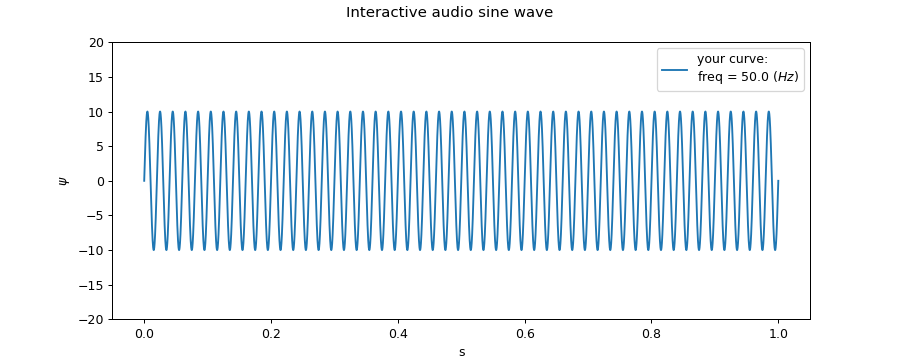

interactive(children=(FloatSlider(value=50.0, description='Frequency (Hz): ', layout=Layout(width='1000px'), m…

In [7]:
%matplotlib nbagg
import matplotlib.pyplot as plt
fig_4, ax = plt.subplots(1, figsize= (10,4))
plt.suptitle('Interactive audio sine wave')
def interactive_audio_curve(freq):
    x = np.linspace(0,1,44100) # x axis from 0 to 1 with a 1/500 step
    y = 10 * np.sin(2 * np.pi * (freq * x + 1))
    display(Audio(y, rate=44100)) 

    ax.clear()
    units = 'freq = {} $(Hz)$'
    
    ax.plot(x,y, label='your curve:'+'\n'+units.format(freq))
    ax.set_xlabel('s')
    ax.set_ylabel('$\psi$')
    ax.set_ylim(-20,20)
    ax.legend(loc=1)
    fig_4
  
freq = widgets.FloatSlider(min=1,max=200,value=50, description = 'Frequency (Hz): ',style = {'description_width': '300px'} ,
                           layout={'width': '1000px'})

widgets.interactive(interactive_audio_curve, freq=freq)

#### Let's go to the next section!: [Calibration of a rainfall-runoff model](../2%20-%20Hydrological%20modelling/Calibration%20of%20a%20rainfall-runoff%20model.ipynb)